Threads: 1, Time Taken: 0.61 seconds
Threads: 2, Time Taken: 0.53 seconds
Threads: 3, Time Taken: 0.56 seconds
Threads: 4, Time Taken: 0.54 seconds
Threads: 5, Time Taken: 0.52 seconds
Threads: 6, Time Taken: 0.47 seconds
Threads: 7, Time Taken: 0.50 seconds
Threads: 8, Time Taken: 0.49 seconds


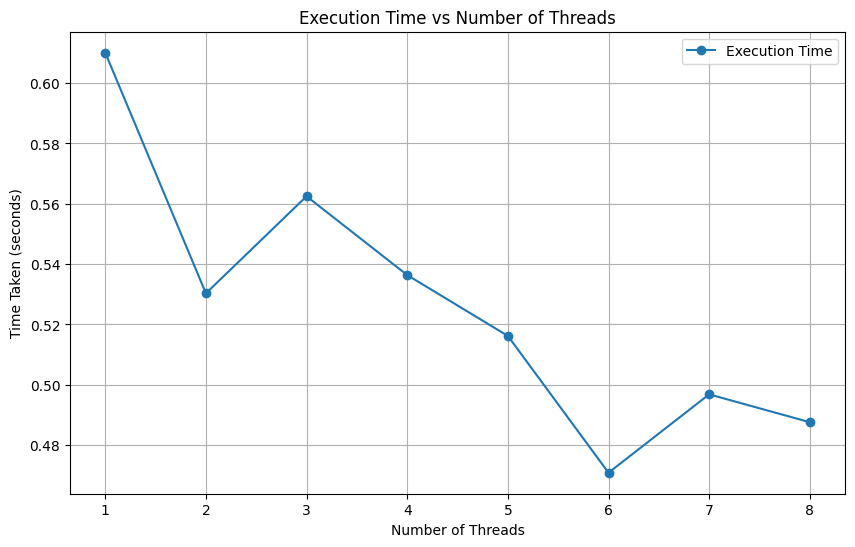

   Threads  Time Taken (s)
0        1        0.610095
1        2        0.530313
2        3        0.562497
3        4        0.536381
4        5        0.516207
5        6        0.470845
6        7        0.496828
7        8        0.487592


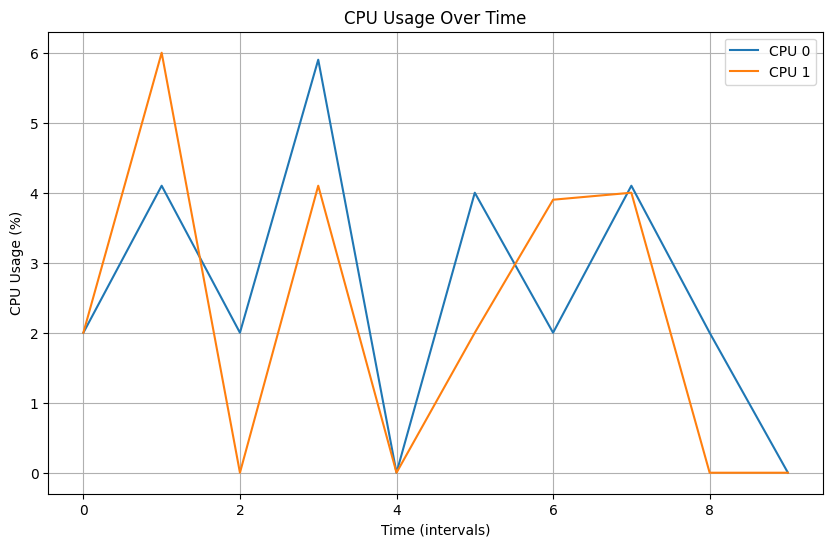

In [1]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time
import psutil
import matplotlib.pyplot as plt
import pandas as pd

random_matrices = [np.random.rand(500, 500) for _ in range(50)]
constant_matrix = np.ones((500, 500))

def multiply_matrices(matrices, constant_matrix, num_threads):
    def multiply(matrix):
        return np.dot(matrix, constant_matrix)

    start_time = time.time()
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        results = list(executor.map(multiply, matrices))
    end_time = time.time()

    return results, end_time - start_time

def monitor_cpu_usage(interval=0.5, duration=5):
    usage = []
    for _ in range(int(duration / interval)):
        usage.append(psutil.cpu_percent(interval=interval, percpu=True))
    return usage

thread_counts = [1, 2, 3, 4, 5, 6, 7, 8]
execution_times = []

for threads in thread_counts:
    _, time_taken = multiply_matrices(random_matrices, constant_matrix, threads)
    execution_times.append(time_taken)

for t, time_taken in zip(thread_counts, execution_times):
    print(f"Threads: {t}, Time Taken: {time_taken:.2f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(thread_counts, execution_times, marker='o', label='Execution Time')
plt.title("Execution Time vs Number of Threads")
plt.xlabel("Number of Threads")
plt.ylabel("Time Taken (seconds)")
plt.grid(True)
plt.legend()
plt.show()

results_table = pd.DataFrame({
    "Threads": thread_counts,
    "Time Taken (s)": execution_times
})
print(results_table)

cpu_usage = monitor_cpu_usage()
plt.figure(figsize=(10, 6))
for i, usage in enumerate(zip(*cpu_usage)):
    plt.plot(usage, label=f"CPU {i}")
plt.title("CPU Usage Over Time")
plt.xlabel("Time (intervals)")
plt.ylabel("CPU Usage (%)")
plt.legend()
plt.grid(True)
plt.show()
